In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# import app

# Do Matplotlib extension below

# use this savefig call at the end of your graph instead of using plt.show()
# plt.savefig('static/images/my_plots.png')

In [2]:
# Constants
DIRECTORY = "classification-challenge/classification-challenge-starter/Covid19-dataset/train"
CLASS_MODE = "categorical" # For multi-class classification
COLOR_MODE = "grayscale"
TARGET_SIZE = (256, 256) # Resize images to 256x256
BATCH_SIZE = 32 # Number of images per batch

# Creating a training data generator with augmentation
training_data_generator = ImageDataGenerator(
    rescale=1.0/255, # rescale pixel values to [0,1]

    # Data augmentation options
    zoom_range=0.1, # Random zoom by up to 10%
    rotation_range=25, # Random rotation between -25 and 25 degrees
    width_shift_range=0.05, # Random horizontal shift
    height_shift_range=0.05 # Random vertical shift
)

# Validation data generator (without augmentation)
validation_data_generator = ImageDataGenerator(rescale=1.0/255)

In [3]:
# Creating training iterator
training_iterator = training_data_generator.flow_from_directory(
    DIRECTORY,
    target_size=TARGET_SIZE,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE
)

# Defining validation directory
VALIDATION_DIRECTORY = "classification-challenge/classification-challenge-starter/Covid19-dataset/test"

# Creating validation iterator
validation_iterator = validation_data_generator.flow_from_directory(
    VALIDATION_DIRECTORY,
    target_size=TARGET_SIZE,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [11]:
# Checking the number of classes in out dataset
print(f"Classes: {training_iterator.class_indices}")
num_classes = len(training_iterator.class_indices)

# Creating sequential model (this was the initial and basic one)
# model = Sequential([
#     # Input layer - shape based on the image dimensions (256x256 grayscale = 1 channel)
#     layers.InputLayer(input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 1)),

#     # Flatten the 2D image data to 1D for the dense output layer
#     layers.Flatten(),

#     # Output layer with softmax activation for multi-class classification
#     layers.Dense(num_classes, activation='softmax')
# ])

# # Compiling the model
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# Creating improved CNN model architecture
model = Sequential([
    # Input layer
    layers.InputLayer(input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 1)),

    # First convolutional block
    layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    # Second convolutional block
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    # Third convolutional block
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),

    # Flattening feature maps
    layers.Flatten(),

    # Dense hidden layer
    layers.Dense(64, activation='relu'),

    # Dropout to prevent overfitting
    layers.Dropout(0.5),

    # Output layer
    layers.Dense(num_classes, activation='softmax')
])

# Compiling model with adjusted hyperparameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Displaying model summary
model.summary()

Classes: {'Covid': 0, 'Normal': 1, 'Pneumonia': 2}


/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │     4,194,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,859 (16.09 MB)

 Trainable params: 4,217,859 (16.09 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Define training parameters
EPOCHS = 15

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Traning the model
history = model.fit(
    training_iterator,
    validation_data=validation_iterator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Evaluating the model on validation data
evaluation = model.evaluate(validation_iterator)

print(f"Validation loss: {evaluation[0]:.4f}")
print(f"Validation accuracy: {evaluation[1]:.4f}")

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.4232 - loss: 1.5074 - val_accuracy: 0.6818 - val_loss: 0.9306
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4154 - loss: 1.2714 - val_accuracy: 0.6667 - val_loss: 0.9931
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4883 - loss: 1.0204 - val_accuracy: 0.5152 - val_loss: 0.9420
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5375 - loss: 0.9391 - val_accuracy: 0.5909 - val_loss: 0.8492
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6467 - loss: 0.7971 - val_accuracy: 0.8333 - val_loss: 0.5680
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6539 - loss: 0.8221 - val_accuracy: 0.6212 - val_loss: 0.6916
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6752 - loss: 0.8434 - val_accuracy: 0.8182 - val_loss: 0.4371
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.7800 - loss: 0.6381 - val_accuracy: 0.8939 - val_loss: 0.3

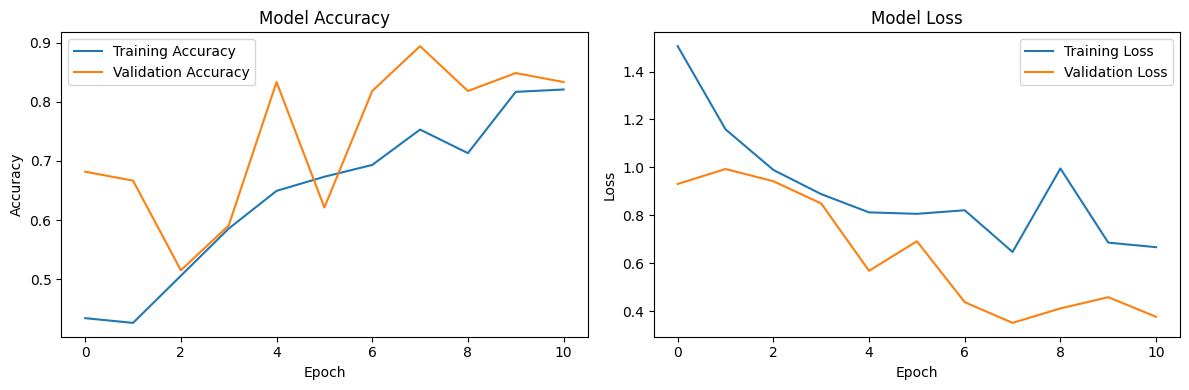

In [13]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('training_results.png')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Classification Report:
              precision    recall  f1-score   support

       Covid       0.45      0.38      0.42        26
      Normal       0.40      0.40      0.40        20
   Pneumonia       0.54      0.65      0.59        20

    accuracy                           0.47        66
   macro avg       0.47      0.48      0.47        66
weighted avg       0.46      0.47      0.46        66


Confusion Matrix:
[[10  9  7]
 [ 8  8  4]
 [ 4  3 13]]


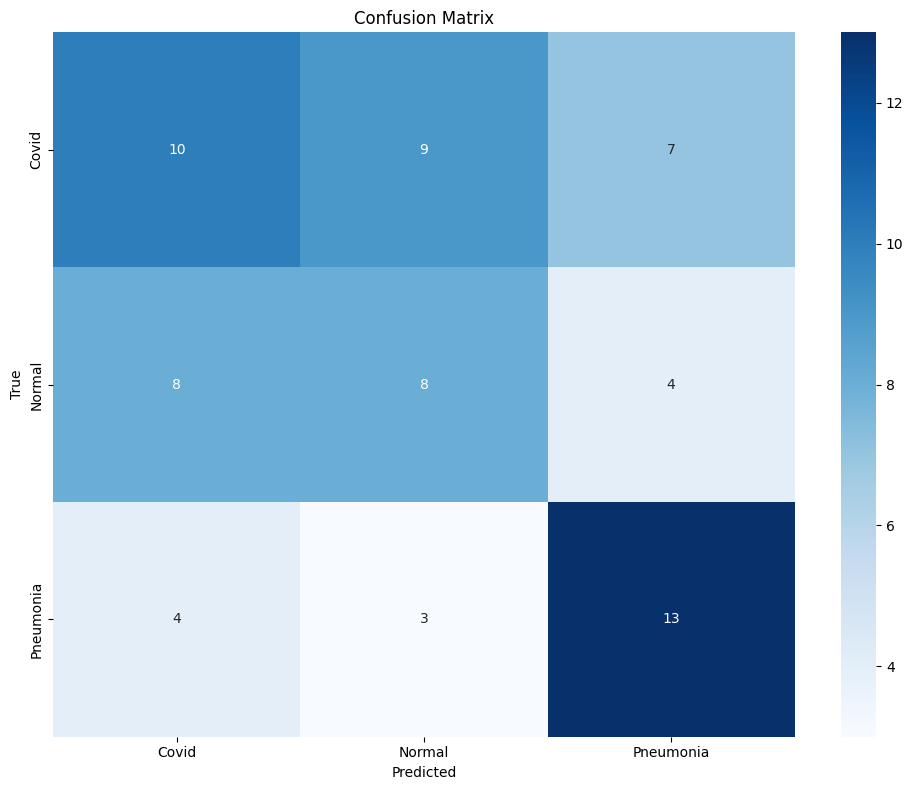

In [17]:
# Generate predictions
test_steps_per_epoch = int(np.ceil(validation_iterator.samples / validation_iterator.batch_size))
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())

# Create classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()